In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# loading dataset
df = pd.read_csv('creditcard_2023.csv')
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [42]:
#data preprocessing
print(df.info())
print(df.isnull().sum())
df['Class'].value_counts()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

<Axes: title={'center': 'Correlation with class'}>

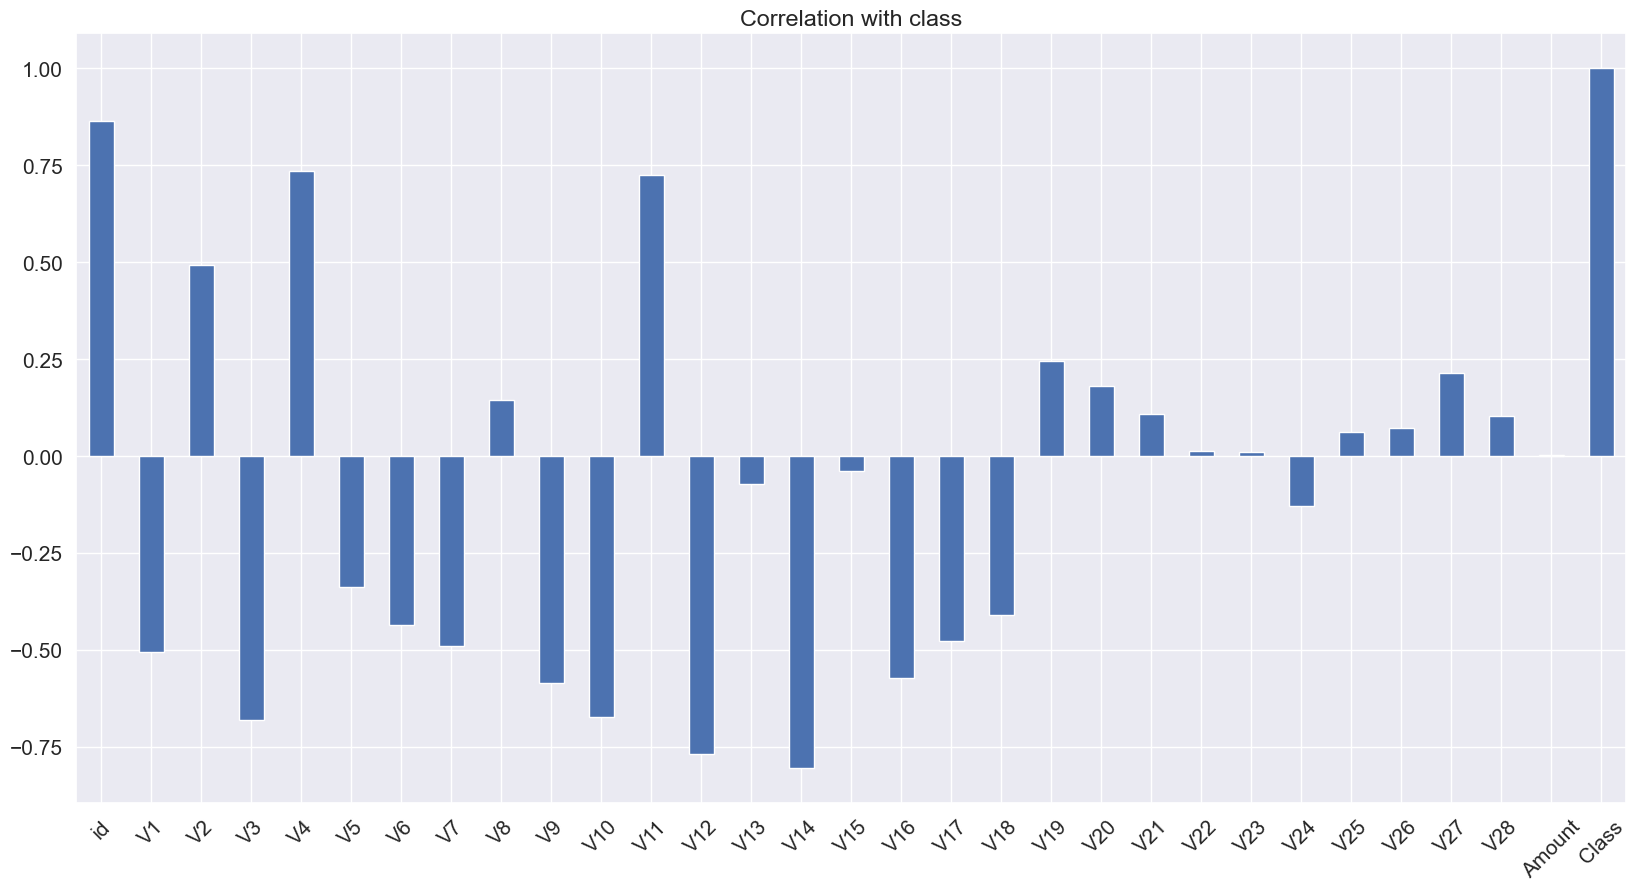

In [43]:
df.corrwith(df.Class).plot.bar(figsize = (20, 10), title = "Correlation with class", fontsize = 15,rot = 45, grid = True)

In [44]:
#Normalisation
from sklearn.preprocessing import StandardScaler
df['normalizedAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'],axis=1,inplace=True)
df.drop(['id'],axis=1,inplace=True)
df.head()

<Axes: xlabel='Class', ylabel='count'>

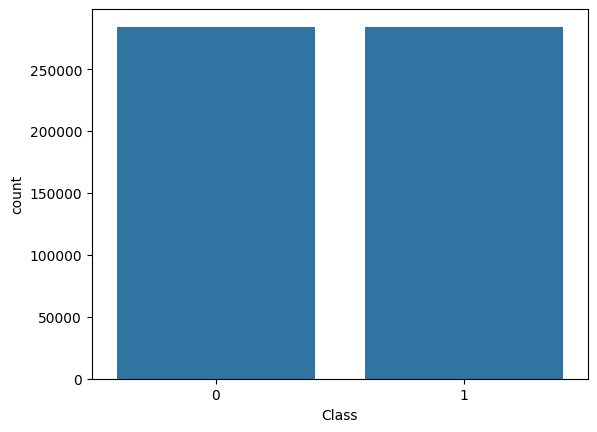

In [6]:
#Visualization
sns.countplot(x="Class", data=df)

In [7]:
#Train Test Split
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

# Original dataset
x = df.drop('Class', axis=1).values
y = df['Class'].values
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


Sampled train dataset shape Counter({0: 227591, 1: 227313})
Sampled validation dataset shape Counter({1: 57002, 0: 56724})


In [8]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [9]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
y_pred_knn=knn.predict(X_test)

In [11]:
#Accuracy
from sklearn.metrics import precision_recall_curve
print("Accuracy KNN:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision KNN:",metrics.precision_score(y_test, y_pred_knn))

print("Recall KNN:",metrics.recall_score(y_test, y_pred_knn))
print("F1 Score KNN:",metrics.f1_score(y_test, y_pred_knn))

Accuracy KNN: 0.9964212229393454
Precision KNN: 0.9930479326747165
Recall KNN: 0.9998596540472264
F1 Score KNN: 0.9964421521919664


In [12]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=3)
ran.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=3)

In [13]:
y_pred_rf=ran.predict(X_test)

In [14]:
#Accuracy
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

Accuracy RF: 0.9831788685085204
Precision RF: 0.9976512674122388
Recall RF: 0.9687203957755868
F1 Score RF: 0.9829730042456231


In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=800,n_jobs=8,random_state=3)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=800, n_jobs=8, random_state=3)

In [16]:
y_pred_lr=lr.predict(X_test)

In [17]:
#Accuracy
print("Accuracy LR:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision LR:",metrics.precision_score(y_test, y_pred_lr))
print("Recall LR:",metrics.recall_score(y_test, y_pred_lr))

Accuracy LR: 0.9614863795438159
Precision LR: 0.9811638199041732
Recall LR: 0.9412301322760604


In [18]:
#Deep Neural Network
import torch
from torch.utils.data import DataLoader, TensorDataset

device = 'cuda' if torch.cuda.is_available() else 'cpu'
x_train_tensor = torch.from_numpy(X_train).to(device)
y_train_tensor = torch.from_numpy(y_train).to(device)

x_test_tensor = torch.from_numpy(X_test).to(device)
y_test_tensor = torch.from_numpy(y_test).to(device)

Train_tensor = TensorDataset(x_train_tensor, y_train_tensor)
Test_tensor = TensorDataset(x_test_tensor, y_test_tensor)

Train_dataset = DataLoader(Train_tensor, batch_size=512, shuffle=True)
Test_dataset = DataLoader(Test_tensor, batch_size=512, shuffle=True)

dat = next(iter(Train_dataset))
print(len(dat[0]))

512


In [19]:
# Building the model
import torch
import torch.nn as nn

class FeedForward(nn.Module):
    
    def __init__(self, input_dim, num_neurons):
        super(FeedForward, self).__init__()
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        
        self.net = nn.Sequential(
            nn.Linear(self.input_dim, self.num_neurons)
            ,nn.ReLU()
        )
        
    def forward(self, x):
        return self.net(x)
    
    def to(self, device):
        self.net.to(device)
        return self

class Net(nn.Module):
    
    def __init__(self, in_features, num_layers, num_neurons):
        super(Net, self).__init__()
        self.in_features = in_features
        self.num_layers = num_layers
        self.num_neurons = num_neurons
        
        self.fc1 = nn.Linear(self.in_features, self.num_neurons)
        self.relu = nn.ReLU()
        self.blocks = [FeedForward(self.num_neurons, self.num_neurons).to(device) for _ in range(self.num_layers)]
        self.output_layer = nn.Linear(self.num_neurons, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        output = self.relu(self.fc1(x))
        for block in self.blocks:
            output = block(output)
        output = self.sigmoid(self.output_layer(output))
        return output

In [20]:
# Defining parameters
epochs = 10
num_layers = 6
num_neurons = 64
alpha = 1e-4
model = Net(in_features=29, num_layers=num_layers, num_neurons=num_neurons)
model = model.to(device)

# Optimizer and loss
optimizer = torch.optim.Adam(model.parameters(), lr=alpha)
criterion = nn.BCELoss()

In [21]:
# Train the model
for epoch in range(epochs):
    train_loss = 0.0
    
    model.train()
    
    for data, label in Train_dataset:
        data = data.to(device)
        label = label.squeeze()
        label = label.to(device)
        optimizer.zero_grad()
        output = model.forward(data.float())
        
        loss = criterion(output.squeeze(), label.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss = train_loss/len(Train_dataset.dataset)
    print('Epoch: {} \tTraining_loss: {:.6f}'.format(epoch, train_loss))

Epoch: 0 	Training_loss: 0.001354
Epoch: 1 	Training_loss: 0.001349
Epoch: 2 	Training_loss: 0.001340
Epoch: 3 	Training_loss: 0.001327
Epoch: 4 	Training_loss: 0.001310
Epoch: 5 	Training_loss: 0.001291
Epoch: 6 	Training_loss: 0.001270
Epoch: 7 	Training_loss: 0.001247
Epoch: 8 	Training_loss: 0.001223
Epoch: 9 	Training_loss: 0.001196


In [53]:
ypred = model(torch.tensor(X_test).float()).detach().numpy()
ypred [ypred>=0.5] =1.0
ypred [ypred<0.5] =0.0
print('Accuracy score: {}'.format(metrics.accuracy_score(y_test, ypred)))
print('Precision score: {}'.format(metrics.precision_score(y_test, ypred)))

Accuracy score: 0.9109614336211597
Precision score: 0.9989781146214767


<Axes: >

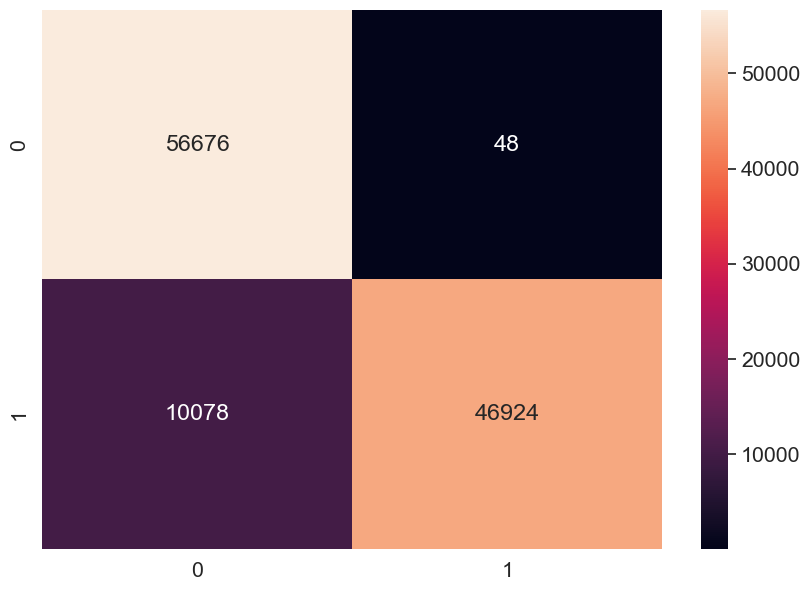

In [50]:
cm = confusion_matrix(y_test, ypred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')



In [38]:
str="0.0982753508383693,0.7878484804705348,-0.9166236421523534,1.4550072529275728,0.4470933044950163,-1.066366483847683,-0.15266670740002808,0.09317298595167375,-1.2406114488902336,-0.6904148745237778,1.033703366313119,-0.9782011633113479,-0.773414522251039,-1.4629239373813667,1.1055419304760439,-0.2853887966046979,0.2097997368033667,0.886065661051348,0.17658827397609303,0.4624458677489291,0.07761457345729127,-0.4577383832031699,-0.022962156312006085,-1.1335886522800533,-0.5733167295593905,1.0471707377778938,0.47494419812451794,0.40854662986401513,0.45"
list=[]
for i in str.split(','):
    list.append(float(i))
result = model(torch.tensor(list).float()).detach().numpy()
result [result>=0.5] =1.0
result [result<0.5] =0.0
if result[0]==1.0:
    print('Fraud')
else:
    print('Not Fraud')

Fraud


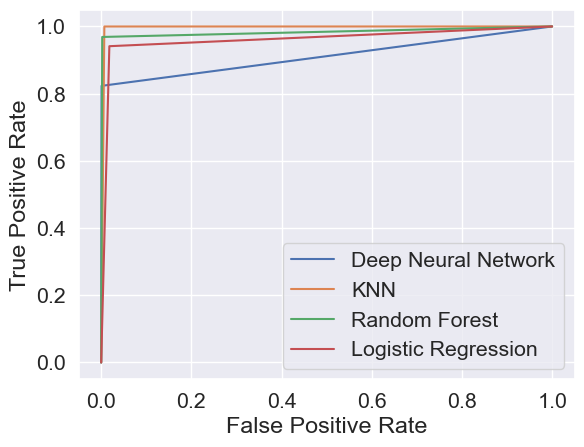

In [59]:
def plot_roc_curve(true_y, y_prob, label=None):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, label=label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(y_test, ypred, label='Deep Neural Network')
plot_roc_curve(y_test, y_pred_knn, label='KNN')
plot_roc_curve(y_test, y_pred_rf, label='Random Forest')
plot_roc_curve(y_test, y_pred_lr, label='Logistic Regression')

plt.legend() 
plt.show()


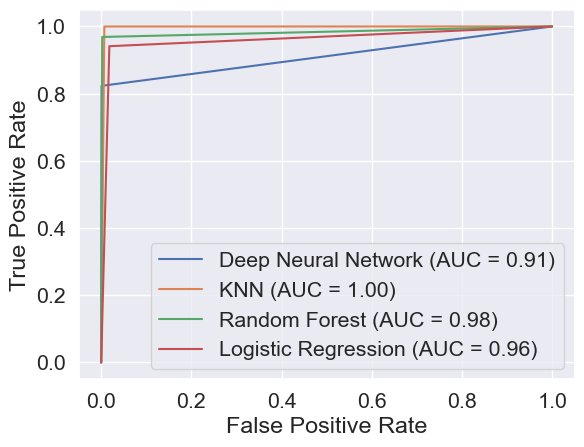

In [62]:
def plot_roc_curve(true_y, y_prob, label=None):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    auc_value = roc_auc_score(true_y, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_value:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, ypred, label='Deep Neural Network')
plot_roc_curve(y_test, y_pred_knn, label='KNN')
plot_roc_curve(y_test, y_pred_rf, label='Random Forest')
plot_roc_curve(y_test, y_pred_lr, label='Logistic Regression')

plt.legend()  
plt.show()
